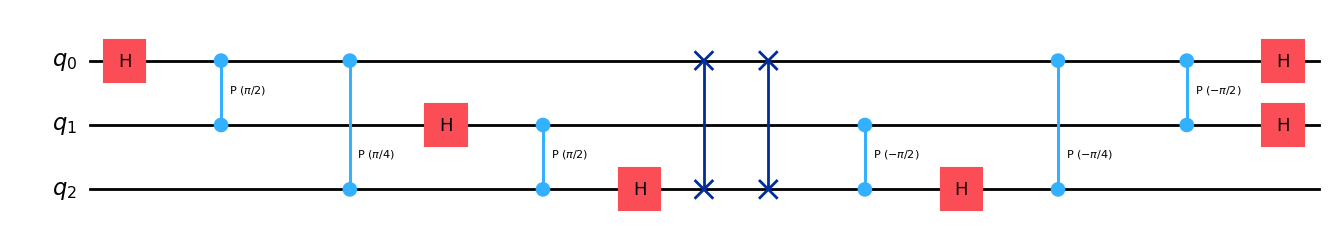

In [1]:
from qiskit import QuantumCircuit
import numpy as np
from qiskit.visualization import plot_histogram

# Create a 3-qubit quantum circuit
qc = QuantumCircuit(3)

### --- QUANTUM FOURIER TRANSFORM (QFT) --- ###

# Step 1: Apply Hadamard and controlled phase shifts in order
qc.h(0)
qc.cp(np.pi/2, 1, 0)  # R2 gate
qc.cp(np.pi/4, 2, 0)  # R3 gate

qc.h(1)
qc.cp(np.pi/2, 2, 1)  # R2 gate

qc.h(2)

# Step 2: Apply SWAP gates to correct bit order
qc.swap(0, 2)

### --- INVERSE QUANTUM FOURIER TRANSFORM (IQFT) --- ###

# Step 3: Apply SWAP gates first (reverse bit order)
qc.swap(0, 2)

# Step 4: Apply inverse controlled phase shifts
qc.cp(-np.pi/2, 2, 1)  # Inverse of R2
qc.h(2)  # Hadamard on qubit 2

qc.cp(-np.pi/4, 2, 0)  # Inverse of R3
qc.cp(-np.pi/2, 1, 0)  # Inverse of R2
qc.h(1)  # Hadamard on qubit 1

qc.h(0)  # Hadamard on qubit 0

# Step 5: Measure all qubits
qc.draw("mpl")


